In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pickle
import json

In [4]:
import vdetect

In [5]:
test_images = [mpimg.imread(f) for f in glob('test_images/*.jpg')]

main_region = vdetect.define_main_region_custom()
mr_x0, mr_y0, mr_x1, mr_y1 = main_region

In [6]:
TIMESTAMP = '2018-04-15_162242'

classifiers_file = 'serialize/{0}/classifiers.p'.format(TIMESTAMP)
scaler_file = 'serialize/{0}/scaler.p'.format(TIMESTAMP)
hp_file = 'serialize/{0}/hyper.json'.format(TIMESTAMP)

hyperparams = vdetect.load_json(hp_file)
scaler = vdetect.load_pickle(scaler_file)
classifiers = vdetect.load_pickle(classifiers_file)

extract = vdetect.create_feature_extractor(scaler, hyperparams)

In [7]:
print(hyperparams)
print()
print(classifiers)

{'hog_block_sz': 2, 'binning_sz': 32, 'hog_n_orient': 9, 'hog_cell_sz': 8, 'hist_bins': 32}

{'random_forest_default': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'decision_tree_default': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'decision_tree_bigger_split': DecisionTreeClassifier(class_weight=None, criterion='

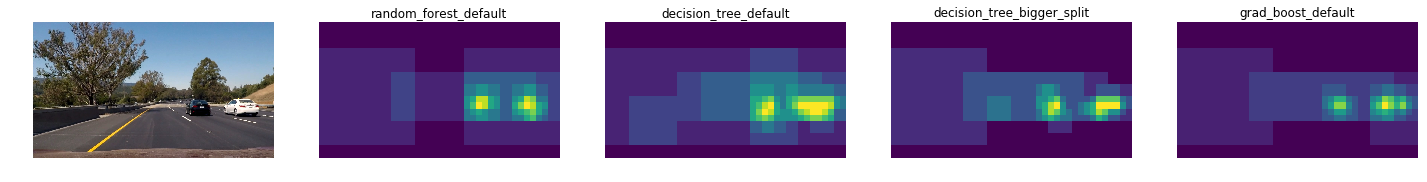

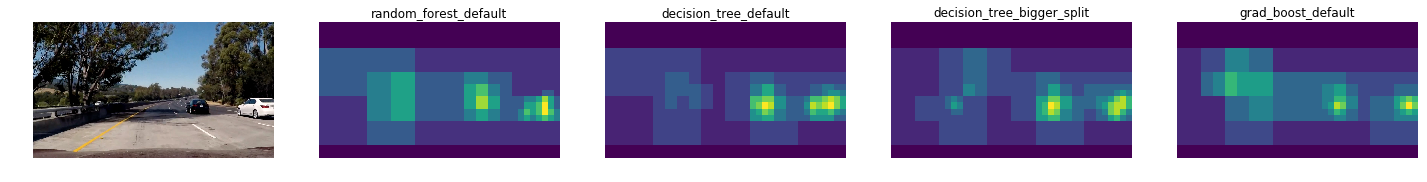

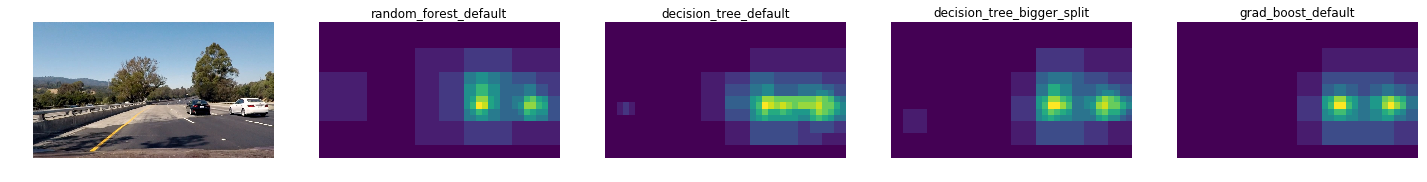

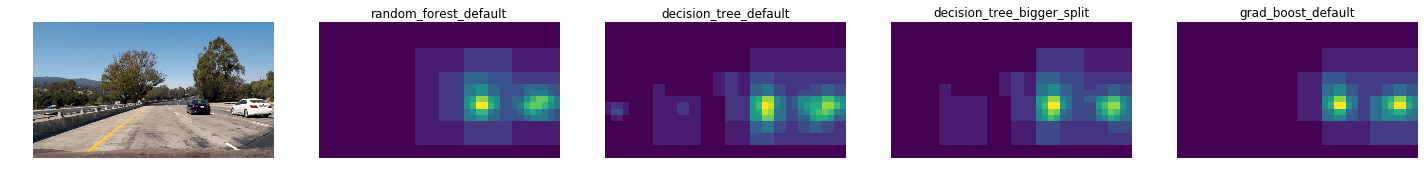

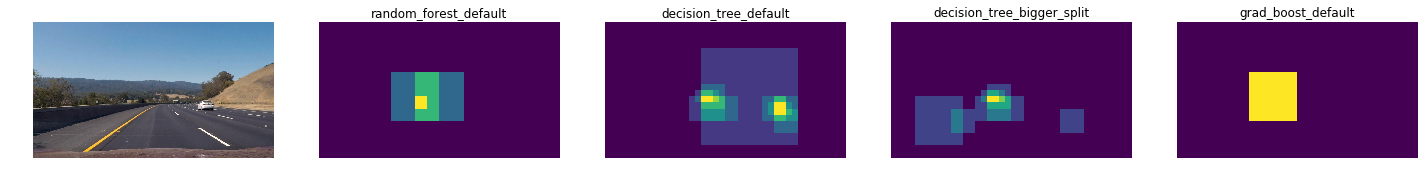

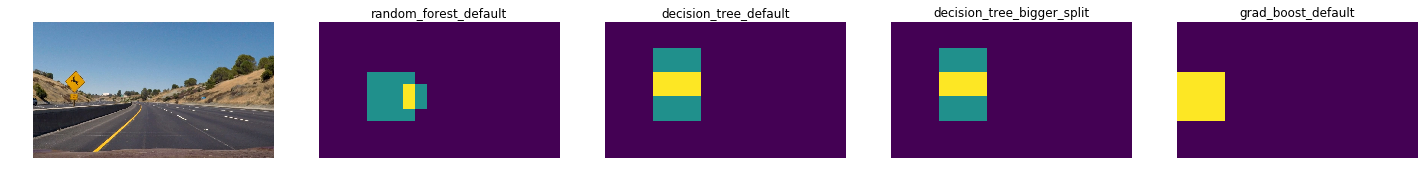

In [8]:
n_cols = len(classifiers) + 1

for im in test_images:

    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, n_cols, 1)
    plt.imshow(im)
    plt.axis('off')
    
    idx = 2
    for k, clf in classifiers.items():
        
        swres = vdetect.sliding_window(im, extract, [classifiers[k]])
        
        plt.subplot(1, n_cols, idx)
        plt.imshow(swres)
        plt.axis('off')
        plt.title(k)
        
        idx += 1
    
    plt.tight_layout()
    

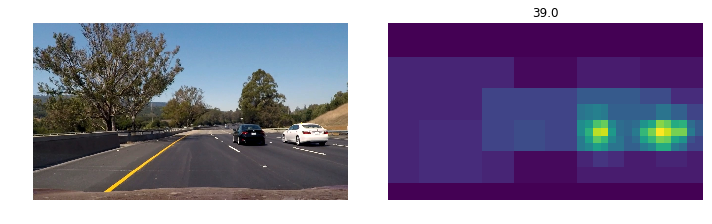

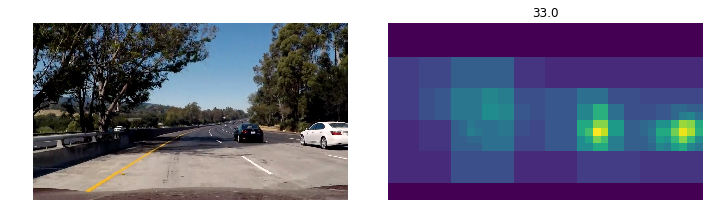

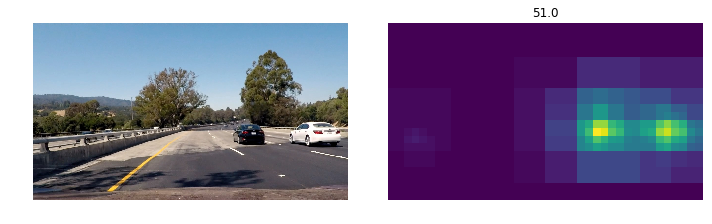

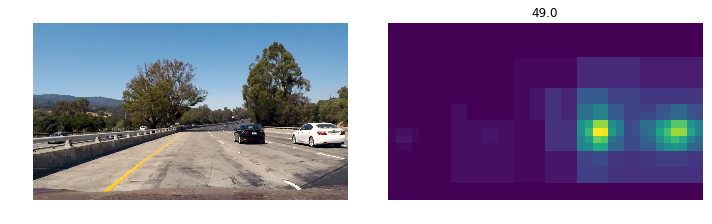

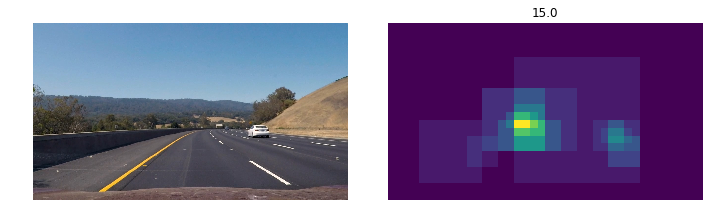

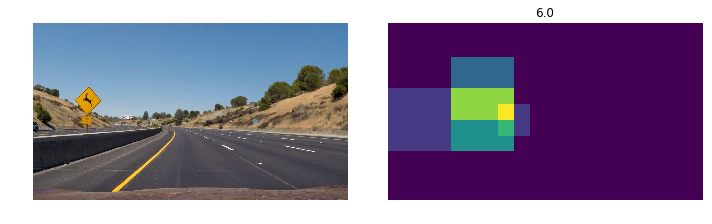

In [9]:

for im in test_images:
    
    selected_clf = [
        classifiers['decision_tree_default'],
        classifiers['decision_tree_bigger_split'],
        classifiers['random_forest_default'],
        classifiers['grad_boost_default']
    ]

    swres = vdetect.sliding_window(im, extract, selected_clf)

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(swres)
    plt.axis('off')
    plt.title(np.max(swres))
    
    plt.tight_layout()
    